Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [ ]:
COLLABORATORS = "Saloni Jain, Carly Kiang"

## To receive credit for this assignment, you must also fill out the [AI Use survey](https://forms.gle/ZhR5k8TdAeN8rj4CA)


---

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Abstract
* Introduction and Problem Description
* Brief discussion of Computational approach and import of any additional packages
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Abstract [10 pts]

Provide a 1-2 paragraph abstract of the project in the style of a research paper.  The abstract should contain

* A brief description of the problem
* A brief justification describing why this problem is important/interesting to you
* A general description of the computational approach
* A brief summary of what you did and what you learned


YOUR ANSWER HERE

## Introduction [15 pts]

In ~4-5 paragraphs, describe 
* The general problem you want to solve
* Why it is important and what you hope to achieve.

Please provide basic **references**, particularly if you are reproducing results from a paper. Also include any basic equations you plan to solve. 

Please use proper spelling and grammar. 

YOUR ANSWER HERE

### References

YOUR ANSWER HERE

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 




YOUR ANSWER HERE

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**


In [6]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Implementation [50 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. using `numpy.testing` routines, or a convergence plot) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

The SEIR model can be described by the following 4 equations:
$$
\begin{align*}
\frac{dS}{dt} &= -\beta S \frac{I}{N}, \\
\frac{dE}{dt} &= \beta S \frac{I}{N} - \sigma E, \\
\frac{dI}{dt} &= \sigma E - \gamma I, \\
\frac{dR}{dt} &= \gamma I.
\end{align*}
$$
If we want to do the same rescaling where $s = S/N$ (the proportion of individuals that are susceptible) and $R_0 = \beta / \gamma$ (the basic reproduction number), we get the following four equations:
$$
\begin{align}
\frac{ds}{dt} &= -\gamma R_0\, s\, i, \\
\frac{de}{dt} &= \gamma R_0\, s\, i - \sigma e, \\
\frac{di}{dt} &= \sigma e - \gamma i, \\
\frac{dr}{dt} &= \gamma i.
\end{align}
$$
Source: https://julia.quantecon.org/continuous_time/seir_model.html, HW5

Peak infection at t = 47.247, i = 0.163290


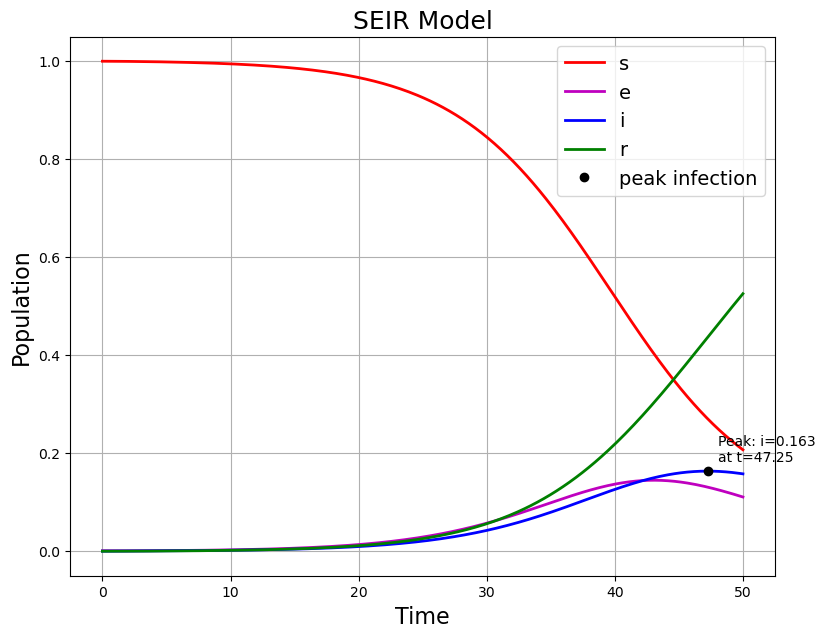

In [13]:
def F(t, u, gamma, R_0, sigma):
    """ RHS of scaled SEIR model of Kermack and McKendrick
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of scaled [ s, i, r ] values such that sum(u) = 1 
            (and s,i, r are fractions of the total population N)
        s_star: float
            scaled critical susceptible population = \beta/(\alpha N)
            
    returns:
        F(u): numpy array
    """
    # YOUR CODE HERE
    s, e, i, r = u
    return numpy.array([-gamma*R_0*s*i, 
                        gamma*R_0*s*i - sigma*e, 
                        sigma*e - gamma*i,
                        gamma*i])

# Event: infection peak (di/dt = 0 ↔ σe - γi = 0)
def infection_peak(t, u, gamma, R_0, sigma):
    s, e, i, r = u
    return sigma*e - gamma*i

infection_peak.terminal = False
infection_peak.direction = -1    # detect downward crossing (peak)

# Parameters
gamma = 1/5
R_0 = 3.0
sigma = 1/4

# Initial conditions
e_0 = 1e-3
i_0 = 1e-4
s_0 = 1 - e_0 - i_0
u_0 = [s_0, e_0, i_0, 0.0]

t_max = 50

# Solve
sol = solve_ivp(
    F, [0, t_max], u_0,
    args=(gamma, R_0, sigma),
    rtol=1e-6, atol=1e-9,
    dense_output=True,
    events=infection_peak
)


# Plot
t = numpy.linspace(0, t_max, 300)
z = sol.sol(t)

fig = plt.figure(figsize=(20,7))
axes = fig.add_subplot(1,2,1)

axes.plot(t, z[0], 'r', linewidth=2, label='s')
axes.plot(t, z[1], 'm', linewidth=2, label='e')
axes.plot(t, z[2], 'b', linewidth=2, label='i')
axes.plot(t, z[3], 'g', linewidth=2, label='r')

# Extract peak
if len(sol.t_events[0]) == 0:
    print("No peak detected.")
else:
    t_peak = sol.t_events[0][0]
    i_peak = sol.sol(t_peak)[2]
    print(f"Peak infection at t = {t_peak:.3f}, i = {i_peak:.6f}")

    axes.plot(t_peak, i_peak, 'ko', label='peak infection')
    axes.annotate(f'Peak: i={i_peak:.3f}\nat t={t_peak:.2f}',
                  xy=(t_peak, i_peak), xytext=(t_peak+0.8, i_peak+0.02))
    
axes.set_xlabel("Time", fontsize=16)
axes.set_ylabel("Population", fontsize=16)
axes.set_title("SEIR Model", fontsize=18)
axes.grid()
axes.legend(fontsize=14)

plt.show()

## Discussion [15 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you might do to fix it.


YOUR ANSWER HERE